<a href="https://colab.research.google.com/github/martinahuang/CUS615/blob/master/Assignment5_Martinahuang_PCA_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Workshop on using PCA
This assignment is intended as a workshop to practice the use of Singular Value Decomposition and Principal Component Analysis as two ways to perform Matrix Factorization and Dimensionality Reduction. 

<div> By: Dr. Christoforos Christoforou </div>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler



## Challenge 1: Apply PCA on sample data - using numpy. 
In this section you need to apply PCA on a simulated dataset. You need to extract the prinipal components and use them to reduce the dimensionality of the data. For this challenge **do not use** sklearn library. Some starting code is provided for you in each cell. Complete all the exercises to earn all points in this challenge. 

In [0]:
#
# Generate the dataset, split it into 
# 
rng = np.random.RandomState(4)     # Seed the random number generator.
n_samples = 1000                    # Specify the number of samples. 
X_all = np.array([5,1,1,1,2]).T + np.dot(rng.rand(5, 5), rng.randn(5, n_samples)).T 
X_train, X_test = X_all[:n_samples//2,:],X_all[n_samples//2:,:] 


### Answer the following question.
Use the cell below to find the answer to the following questions. 

- What is the dimensions of `X_train` and `X_test`?
- How many `features` does each sample has (i.e. what is the dimensionality of the observations in data matrix X_all)?
- Create three 2D scatter plots to show the relationship between to features-pairs (1,2), (1,4), (3,4)? Make sure you label each scatter plot. 

As an example, the following code create a scatter plot between the 1st and 3rd feature dimension
```python 
plt.scatter(X_train[:,1],X_train[:,3])
plt.title("Scatter plot between feature 2 and feature 4")
plt.xlabel("Feature 2")
plt.ylabel("Feature 4")
plt.axis("square")

``` 

In [0]:
#
# Use this cell to figure out the anwers to the questions above.
#
# 1. The dimensions for  X train are 2 
    # The dimensions and for X_test are start from the second np.array thus, there are 2 dimensions.


#2. There are 500 samples and 5 features in X_train and 500 samples and 5 features in X_test.
     # X_all has 2 dimensions



In [17]:
X_test.shape, X_train.shape, X_all.ndim

((500, 5), (500, 5), 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


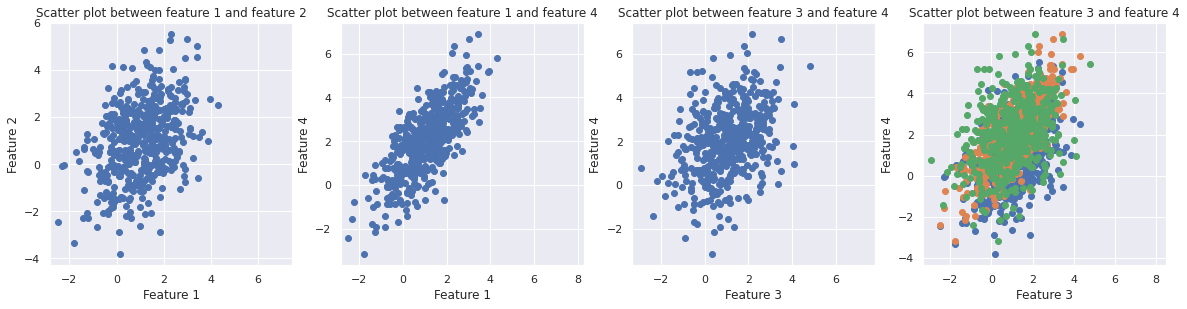

In [18]:
#
# Display the scatter plot between the feature pairs (1,2), (1,4), (3,4) 
# 
plt.figure(figsize=(20,10))

# Plot the scatter plot between feature-pair (1,2) 
plt.subplot(1,4,1)
plt.scatter(X_train[:,1],X_train[:,2])
plt.title("Scatter plot between feature 1 and feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("square")


# Plot the scatter plot between feature-pair (1,4)
plt.subplot(1,4,2)
plt.scatter(X_train[:,1],X_train[:,4])
plt.title("Scatter plot between feature 1 and feature 4")
plt.xlabel("Feature 1")
plt.ylabel("Feature 4")
plt.axis("square")


# Plot the scatter plot between feature-pair (3,4)
plt.subplot(1,4,3)
plt.scatter(X_train[:,3],X_train[:,4])
plt.title("Scatter plot between feature 3 and feature 4")
plt.xlabel("Feature 3")
plt.ylabel("Feature 4")
plt.axis("square")


# Plot the scatter plot between feature-pair (1,2) 
plt.subplot(1,4,4)
plt.scatter(X_train[:,1],X_train[:,2])
plt.title("Scatter plot between feature 1 and feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("square")
# Plot the scatter plot between feature-pair (1,4)
plt.subplot(1,4,4)
plt.scatter(X_train[:,1],X_train[:,4])
plt.title("Scatter plot between feature 1 and feature 4")
plt.xlabel("Feature 1")
plt.ylabel("Feature 4")
plt.axis("square")
# Plot the scatter plot between feature-pair (3,4)
plt.subplot(1,4,4)
plt.scatter(X_train[:,3],X_train[:,4])
plt.title("Scatter plot between feature 3 and feature 4")
plt.xlabel("Feature 3")
plt.ylabel("Feature 4")
plt.axis("square")

plt.show()


### Exercise 1.1 : Calculate the covariance matrix.
Calculate the covariance matrix of the training data matrix `X_train`. Show all you steps as outlined in the skeleton code provided. In particular, you need to 
calculate the observations' mean; subtract the mean from the data matrix; standardize the observations by dividing each feature with its corresponding standard deviation; and calculate the covarnace matrix. 

**Hints**
  - Notice that you can find the mean of an array `A` along a particular dimension `b`, using the numpy command `np.mean(A,axis=b)`. In case `b=0` the mean is taken along the 0th dimension (i.e along the rows), when `b=1` the mean is taken along the 1st dimension (i.e. along the columns). Similarly, you can find the standard deviation of the array using the command `np.std(A,axis=b)` 

  - Python `broadcasting` allows you to perform artithmetic operation on arrays with different sizes, thus vectorizing the arithmetic operations and eliminates the need for using inefficent for loops. The following example shows how boradcasting is used to add  a row vector from every row in the 2D array.
  ```python
    # Example of using broadcasting
    sample = np.array([[2,4], [10,-5]])
    to_add = np.array([3,7])
    sample_add_using_broadcasting  = sample + to_add 
    print(sample)
    print(sample_add_using_broadcasting)
  ``` 
  - The covariance matrix of a data matrix $X\in \mathbb{R}^{N\times D}$(i.e. a matrix with $N$ rows/observations and $D$ columns/features is defined as 
    $\frac{1}{N-1} X^T X$ where the term $\frac{1}{N-1}$ is the normalization constant, and $^T$ denotes the matrix transpose. 
     In numpy, we can multiply two numpy arrays/matrices using the `np.matmul()` method and we can transpose a matrix by accessing the `.T`  property of the array (i.e. `np.matmul(X.T,X)`).


In [0]:
#
# Calculate the mean of X_train
# 

X_mean = np.mean(X_train)

#
# Subtract the mean 
#

X_train_mean_subtracted = X_all - X_mean

# 
# Standarized observation to unit variance (i.e. divide by standard deviation)
#

X_std = np.std(X_train.T)
X_train_std = X_train.T/X_std.T


#
# Calculate the covariance of the standarized observations.
# Make sure you use the appropripate normalization constant 

X_train_cov = np.cov(X_train_std.T)


In [0]:
print(X_train_cov)

[[0.47726892 1.07114772 1.1119482  ... 0.36011532 0.76808071 0.40245277]
 [1.07114772 2.41296599 2.50889746 ... 0.80688047 1.72939391 0.90054223]
 [1.1119482  2.50889746 2.61079242 ... 0.83705556 1.79785731 0.93354202]
 ...
 [0.36011532 0.80688047 0.83705556 ... 0.27192603 0.57871809 0.30404938]
 [0.76808071 1.72939391 1.79785731 ... 0.57871809 1.23959551 0.64600472]
 [0.40245277 0.90054223 0.93354202 ... 0.30404938 0.64600472 0.34024133]]


#### Answer the following questions:
Use the cell below to answer the following questions and show your work.

- Print the content of the covariance matrix.
- What are the dimensions of the covariance matrix `X_train_cov` 
- What values do you see on the diagonal elements of the covariance matrix.
- Which feature-pairs have the largest covariance value; what is that value. 

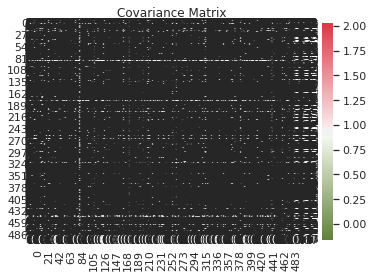

[[ 1.34419542  0.43755956  1.05780733 ...  0.14485977  1.05002179
   0.17972209]
 [ 0.43755956  0.55858339  0.74936144 ...  0.58865395  0.48382513
   0.51638126]
 [ 1.05780733  0.74936144  1.39502536 ...  0.35124038  1.16670374
   0.43598586]
 ...
 [ 0.14485977  0.58865395  0.35124038 ...  1.2479663  -0.06701164
   0.8826452 ]
 [ 1.05002179  0.48382513  1.16670374 ... -0.06701164  1.12143576
   0.11087449]
 [ 0.17972209  0.51638126  0.43598586 ...  0.8826452   0.11087449
   0.66530316]]


In [20]:
#
# Complete the code below to display a heatmap of the Covariance matrix 
#
colormap = sns.diverging_palette(110, 10, as_cmap=True)
sns.heatmap(X_train_cov, cmap= colormap, annot=True, fmt=".2f")
plt.title("Covariance Matrix")
plt.show()


#
# Write code to find the answers to the questions in the cell above. 
#
print(X_train_cov)


In [21]:
X_train_cov.ndim

2

### Exercise 1.2: Estimate the Eigen-vectors and Eigen-values of the covariance matrix. 
The principal components of a covariance matrix are the eigen-vectors of the covariance matrix. The variance of each principal component is proportional to the eigen-value of its corresponding eigen-vector. 

As part of this exercise you need to extract the two the principal component of the covariance matrix that have the highest variance. Then answer the following questions. 

**Hints**
- The numpy method `eigh` can be used to estimate the eighen-vectors and eigen-values of a square symetric matrix. For example, 
```python 
  a_symetric_square_matrix = np.array([[1,0.7],[0.7, 1]])
  eig_vals, eig_vecs  = np.linalg.eigh(a_symetric_square_matrix)
```




In [0]:
#
# Calculate the eigenvectors and eigenvalues of the covariance matrix. 
# 
import scipy.linalg as la

eig_vals, eig_vecs = np.linalg.eigh(X_train_cov)



#### Answer the following questions. 
Use the code-cell below to find the answer to the following questions and show your work.
- Print the eigen-vector with the largest eigen-value, also print the eigen-value itself, and the index of the vector in the `eig_vecs` matrix

- Print the eigen-vector with the second largest eigen-value, also print the eigen-value itself, and the index of the vector in the `eig_vecs` matrix

- Calculate the percentage of the variance in the data that is captured by the three eigen-vectors with the largest eigen-values.

- Calculate the total variance captured by the two eigen-vectors with the smallest eigen-values. 

- What is the minimum number of principal component you can use to ensure that the least `85%` of the variance is captured in the reduced dataset.  

In [36]:
#
# Use this cell to find the answers to the above questions, and to show your work. 
#
print("first tuple of eig:", eig_vals)
print("second tuple of eig", eig_vecs)

first tuple of eig: [-1.46431335e-13 -1.07373563e-13 -9.68829325e-14 -9.38455969e-14
 -7.86761955e-14 -7.39435456e-14 -5.55890708e-14 -5.49559973e-14
 -4.56115277e-14 -3.84551034e-14 -3.33226723e-14 -3.21184544e-14
 -3.19155585e-14 -2.76019147e-14 -2.56654068e-14 -2.19612122e-14
 -2.18551876e-14 -2.17323543e-14 -1.90074833e-14 -1.89422551e-14
 -1.82219097e-14 -1.79459963e-14 -1.67819353e-14 -1.57431203e-14
 -1.56588072e-14 -1.41844775e-14 -1.17320153e-14 -1.16118504e-14
 -1.02251182e-14 -9.07691846e-15 -8.44167811e-15 -7.88483821e-15
 -7.38656086e-15 -7.30643867e-15 -6.51298106e-15 -6.27702127e-15
 -6.16264835e-15 -6.08152633e-15 -6.02168009e-15 -5.98894566e-15
 -5.84832408e-15 -5.83214553e-15 -5.62820431e-15 -5.60717272e-15
 -5.52917013e-15 -5.45590648e-15 -5.35161802e-15 -5.33867569e-15
 -5.25095022e-15 -5.15761958e-15 -5.09238287e-15 -5.08744676e-15
 -5.03445450e-15 -5.00123849e-15 -4.95585100e-15 -4.94568721e-15
 -4.84735579e-15 -4.81210872e-15 -4.73848169e-15 -4.73792916e-15
 -4.6

### Exercise 1.3 Dimensionality Reduction using Principal Components
Use the principal component you calculated in the previous step to reduce the dimensionality of the feature space. 

- First, you must identify the two principal component with the highest variance (i.e. using the eigen-values you calculated in the previous code-cells).Then append the two principal components into their own matrix `PCA_mx` such that the metrix columns correspond to the selected Principal Components. 

- Use the resulting matrix `PCA_mx` to reduce the dimensions in the training set; from its original dimension down to two dimentions. You can do that by multiplying the *standaraized* training set X_train_std with the principal component's matrix `PCA_mx`. Store the resulting reduced-dimensionality training set into a variable `X_train_proj` 

- Use the resulting matrix `PCA_mx` to reduce the dimensions in the testing set; `X_test`. (*Hint: you must first standardize the testing set; using only quantities you calculated from the training set. Remember, standardization is the process of transforming the data to zero mean, and unit standard deviation*). Store the resulting reduced-dimensionality training set into a variable `X_test_proj`    




In [0]:

#
# Create a matrix whose columns are the two major principal component.
# 

PCA_mx = ...

#
# Project the training set X_train onto the two major principal Components. 
# Use the matrix PCA_mx 

X_train_proj = ...


In [0]:
#
# Project the test dataset X_test onto the two major principal components
# See hint for answering. 
# 

X_test_mean_subtracted = ...

X_test_std = ...

X_test proj = ... 


#### Answer the following questions
Use the code-cells below to find the anwers to the following question, and display the requested figures.

- What is the shape of the matrix `X_train_proj` and what does each dimension represents. 

- What is the shape of the matrix `X_test_proj` and what does each dimension represents. 

- Display a scatter-plot showing the `X_train_proj` data.

- Display a scatter-plot showing the `X_test_proj` data. 

- Calculate the covariance matrix of `X_train_proj` and identify what is the covariance between the first and second features. 

- Calculate the covariance matrix of `X_test_proj` and identify what is the covariance between the first and second features. 





In [0]:
#
# Use this code-cell to find the answer to the questions above. 
# 
X_train_proj.shape()
X_train_proj.head()
    
X_test_proj.shape()
X_test_proj.head()

In [0]:
#
# Display the scatter-plots of the reduced-dimensional training and testing datasets.
#

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X_train_proj[:,1],X_train_proj[:,2])
plt.title("Reduced-dimensional Training Set")
plt.axis('equal')


plt.subplot(1,2,2)
plt.scatter(X_test_proj[:,1],X_test_proj[:,2])
plt.title("Reduced-dimensional Test Set")
plt.axis('equal')
plt.show()

## Challenge 2: Apply PCA on sample data - Using the sklearn library

Principal Component Analysis is often used as a pre-processing and dimenionality-reductiion step in predictive modeling. As such, the sklearn library provides a helper class that encapulates the step of extracting the principal component. 

Specifically, sklearn library provides the `PCA` class as part of its `sklearn.decomposition` module. You can clear a new instance of the PCA class as follows:
```python 
  pca = PCA(n_components=2) 
```
Notice the the variable `n_components` specifies the number of principal components we want to keep as part of the dimensionality reduction. 

To apply the PCA class, we must make sure that we standardize the dataset, that is to transform the data so they have zero mean and unit variance. Sklearn provides another helper function the  performnce the standardization of the data. The `StandardScaler` class, part of the `sklearning.preprocessing` module achieves that. For example, the following code would standardize a matrix X
```python 
D = np.array([[1,2],[4,9],[1,5],[7,19],[4,9]])
sc = StandardScaler()
sc.fit_transform(D)        # Learn the standardization parameters (i.e. mean, std parameters)
D_std = sc.transform(D)    # Standardize the dataset D

np.cov(D_std.T, ddof=False)# Check the covariance matrix.
```

Once the dataset is standardized, we can extract the principal components using the `fit` method of the `PCA` class, for example using

```python 
pca.fit(D_std)
``` 
Notice that under the hood the fit method creates the covariance matrix, and solves the eigen-vector/eigen-value problem. 

The principal components (i.e. eigen-vectors) and their explained variance (i.e. corresponding eigen-value) can be retrived from the fitted `pca` instance through the `explained_variance_` and `components_` attributes, such as 
```python
print("Extracted Principal Components (i.e. eigen-vectors")
print(pca.components_)

print("Explained variabce of extracted components (i.e. eigen-values)
print(pca.explained_variance_)
```
Finally, project a dataset onto the extracted principal components, we can use the `transform` method of the PCA class. For example,
```python
D_projected = pca.transform(D_std)
``` 
**Exercise**
Using the reference code above, extract the principal components of the same sample dataset (as the one in Challenge 1), but now using the helper classes provided in the sklearn library.  Moreover, reduce the dimensionality of the `X_train` and `X_test` dataset by projecting to the two major principal components. 
 



In [0]:
# Import the sklearn libaries 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

In [0]:
#
# Create an Instance of the PCA class from sklearn.decomposition import PCA
#

pca = PCA(n_components=2) 



#
# Standardize the training and testing dataset. 
#

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

#
# Extract/learn the principal components
#




#
# Project the train dataset onto the two major principal components. 
#

X_train_proj_sklearn = pca.fit_transform(X_train_std)



#
# Project the train dataset onto the two major principal components. 
# Hint: do not forget to standardize the test dataset. 

X_test_proj_sklearn = pca.fit_transform(X_test_std)



(-3.288934817756037, 3.5190705126209303, -3.2889348177560374, 3.51907051262093)

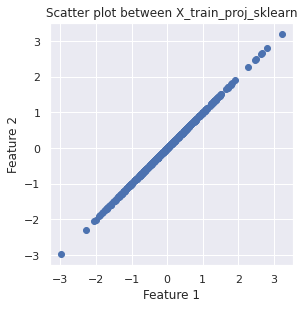

In [39]:
#
#  Display a scatter-plot showing the `X_train_proj_sklearn` data.
#
#  Display a scatter-plot showing the `X_test_proj_sklearn` data. 
#. Hint: See sample code from Challenge 1.
#  


plt.figure(figsize=(20,10))

# Plot the scatter plot between feature-pair (1,2) 
plt.subplot(1,4,1)
plt.scatter(X_train_proj_sklearn[:,-1],X_train_proj_sklearn[:,1])
plt.title("Scatter plot between X_train_proj_sklearn")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("square")

# your code here

## Challenge 3: Perform PCA to reduce the dimensions of the wine dataset.

The code-cell below load an example dataset called `wine.data` as a panda's dataframe, and then split it into a training `X_train` and testing dataset `X_test`. Each observation corresponds to a particular wine brand and the features correspond to various characteristics associated with each wine (for example, 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium'). There are total 13 such features for each wine. Moreover, each wine belongs to one of three quality classes (i.e. 1,2 or 3). The class labels for each onservation are stored in the `y_train` and `y_test` vectors. 


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
                   
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

### Exercise 3.1  

Your goal is to find a classifier to predict the quality class of a wine, given its observed features. You suspect that several of the features covay and that you are better off to reduce the number of dimession of the same before performing the classificaton.

In this exercise you are expected to use PCA to reduce the dimensionality of the original dataset from 13 down to two. Then use the K-NN to train a classifier that predicts the wine quality class. 

Compare the performance of your classifier, to a classifier that uses all 13 features. You must report cross validation performance, and independent test performance. 



In [0]:
#
# Use as many code-cell you deem necessary to complete exercise 3.1
# Make sure you add comments, to explain your code. 
# 

In [0]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.decomposition import PCA
import pandas as pd

In [43]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier


In [51]:
pca = PCA(n_components=2)
sc = StandardScaler() 
Xsm_sklearn =  sc.fit_transform(X)
pca.fit(Xsm_sklearn)

print("Eigen Values")
print(pca.explained_variance_) 
print("Eigen Vectors")
print(pca.components_)

Eigen Values
[4.73243698 2.51108093]
Eigen Vectors
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


In [52]:
Xsm_apply = sc.transform(X)

X_pca = pca.transform(Xsm_apply)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (178, 13)
transformed shape: (178, 2)


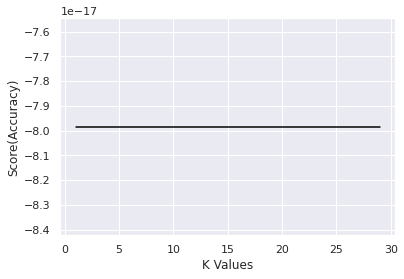

In [54]:
scores = []
for each in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = each)
    score = pca.transform(Xsm_apply)
    scores.append(score.mean())
    
plt.plot(range(1,30),scores,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [56]:
knn_find = KNeighborsClassifier()
knn_find.fit(X_train,y_train) 
knn_prediction = knn_find.predict(X_test)
print("{}-NN Score: {}".format( k ,knn_find.score(X_test,y_test)))
knn_score = knn_find.score(X_test,y_test)

5-NN Score: 0.7222222222222222


In [63]:
np.var(knn_score)

0.0

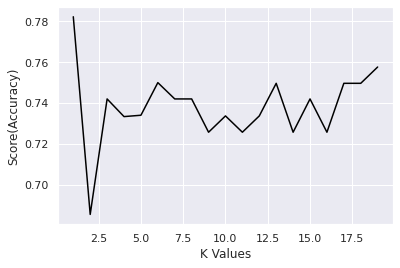

In [59]:
from sklearn.model_selection import cross_val_score

scores = []
for each in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = each)
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    scores.append(score.mean())
    
plt.plot(range(1,20),scores,color="black")
plt.xlabel("K Values")
plt.ylabel("Score(Accuracy)")
plt.show()

In [64]:
knn_find = KNeighborsClassifier(n_neighbors = 6) #n_neighbors = K value
knn_find.fit(X_train,y_train) 
knn_prediction = knn_find.predict(X_test)
print("{}-NN Score: {}".format(6,knn_find.score(X_test,y_test)))
knn_score1 = knn_find.score(X_test,y_test)

6-NN Score: 0.6481481481481481


In [65]:
np.var(knn_score1)

0.0

#### Summarize the results of your analysis on the wine Dataset.
Use the following text-cell to summarize the results of your analysis. For example, consider the following questions: which classifer performces better and by how match? Did PCA dimensionallity reduction helped imporove the classification performance or not? Should you have used more or less principal components to improve classification performance. How much of the variance is captured by the reduced feature space? 


#### Your results summary here

The k-NN classification with PCA shows an accuracy value of 0.72 while the k-NN with cross validation showed an accuracy of 0.65. PCA helped improve the performance. 

## License 

<div> This workbook is prepare by Dr. Christoforos Christoforou for the purposed of course. If you identify any typos/errors please let the author know. Not for circulation outside the course</div>